In [98]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
%config InlineBackend.figure_format = 'svg'

In [99]:
def plot_results(results, model_name, param_name):
    metrics = results[list(results.keys())[0]].keys()

    fig, axs = plt.subplots(len(metrics),1, sharex=True, squeeze=False)

    for metric, ax in zip(metrics, axs.ravel()):
        k_number = list(results.keys())
        performances = [score[metric] for score in results.values()]
        best_k_for_metric = k_number[np.argmax(performances)]
        ax.plot(k_number, performances)
        ax.vlines(x=best_k_for_metric, ymin=0, ymax=1, linestyles=':', color='C2')
        min_perf, max_perf = min(performances), max(performances)
        perf_range = max_perf-min_perf
        ax.set_ybound(min_perf-perf_range*0.2, max_perf+perf_range*0.2)
        ax.set_ylabel(metric.title())
        ax.set_xmargin(0.01)

    fig.supxlabel(param_name)
    fig.suptitle(f'{model_name} Performance by {param_name}')
    fig.tight_layout()

    return fig, axs

In [100]:
def open_and_plot_results(file, model_name, param_name):
    with open(file=file, mode='r') as results_file:
        score_results = json.load(fp=results_file)
        plt.style.use('petroff10')
        return plot_results(results=score_results, model_name=model_name, param_name=param_name)

In [113]:
# Plot KNN parameterization
def explore_in_rundir(rundir, model_specs, save_figs=False):
    for model_spec in model_specs:
        fig, axs = open_and_plot_results(file=os.path.join(rundir, 'results', f'{model_spec["model_name"]}.json'), model_name=model_spec['model_name'], param_name=model_spec['param_name'])
        if save_figs:
            save_filename = os.path.join(rundir, 'figures', f'{model_spec["model_name"]}.png')
            os.makedirs(os.path.dirname(save_filename), exist_ok=True)
            fig.savefig(fname=save_filename, dpi=200)

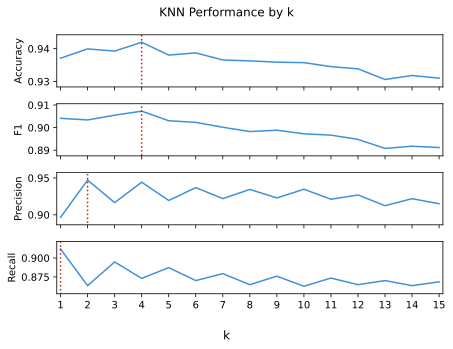

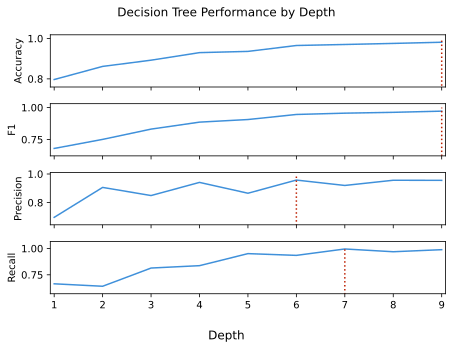

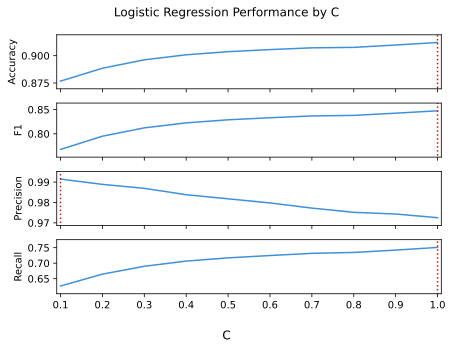

In [114]:
explore_in_rundir(rundir='../testing_evaluations',
                  model_specs=[
                      {'model_name': 'KNN', 'param_name': 'k'},
                      {'model_name': 'Decision Tree', 'param_name': 'Depth'},
                      {'model_name': 'Logistic Regression', 'param_name': 'C'}
                  ],
                  save_figs=True)